In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
medical_cost = pd.read_csv("/content/insurance.csv")
df = medical_cost.copy()

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#No null values, great!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
bmi_stats = df["bmi"].describe()
print(bmi_stats)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


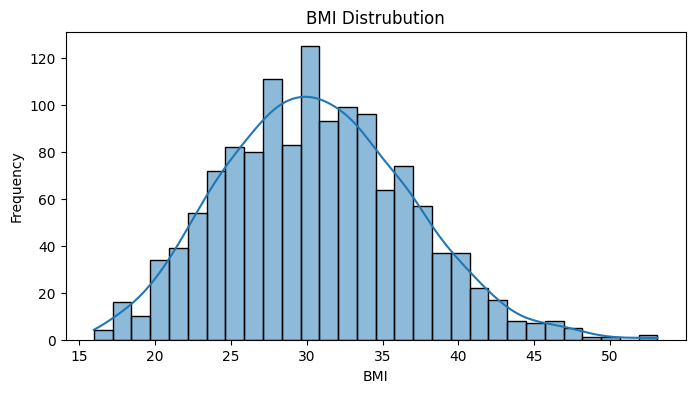

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distrubution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

In [9]:
#BMI mostly varies between 25 and 35.

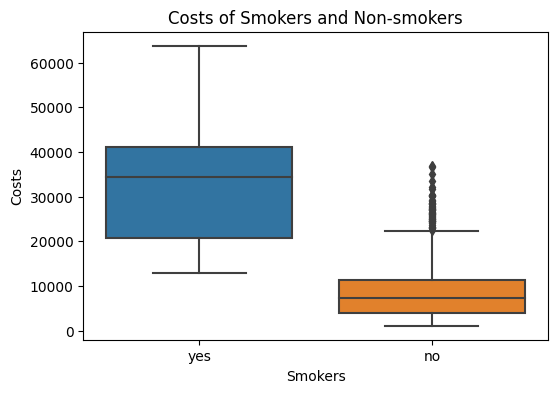

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Costs of Smokers and Non-smokers")
plt.xlabel("Smokers")
plt.ylabel("Costs")
plt.show()

In [11]:
#Smokers have higher charges compared to non-smokers.

In [12]:
smoker_region_counts = df.groupby(["smoker", "region"]).size().unstack()
print(smoker_region_counts)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


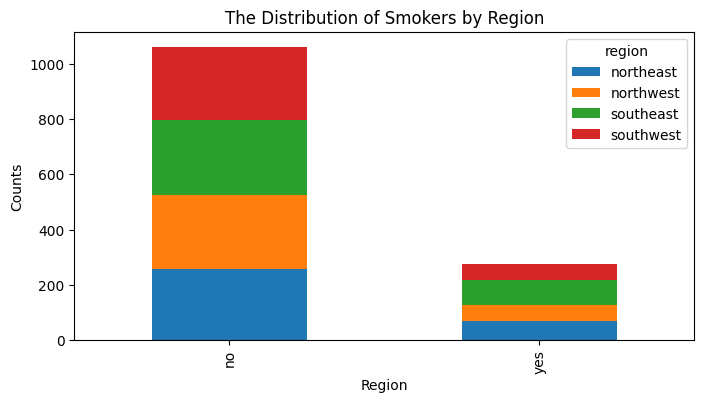

In [13]:
smoker_region_counts.plot(kind="bar", stacked=True, figsize=(8, 4))
plt.title("The Distribution of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Counts")
plt.show()

In [14]:
#In the Southeast, the number of smokers are high.

In [15]:
bmi_sex_stats = df.groupby("sex")["bmi"].describe()
print(bmi_sex_stats)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


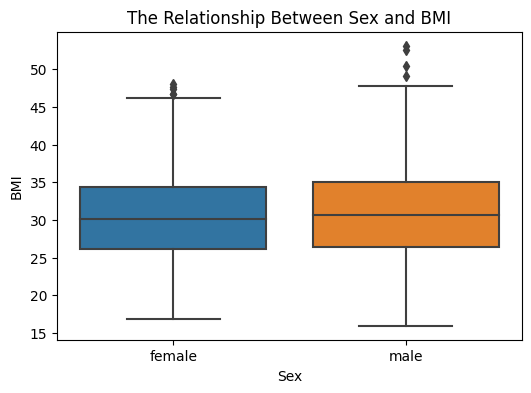

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("The Relationship Between Sex and BMI")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

In [17]:
#Men's BMI is slightly higher than women's.

In [18]:
region_children_sum = df.groupby("region")["children"].sum()
max_children_region = region_children_sum.idxmax()
max_children_count = region_children_sum[max_children_region]

In [19]:
print(f"The region with the most children is {max_children_region} with {max_children_count} children.")

The region with the most children is southeast with 382 children.


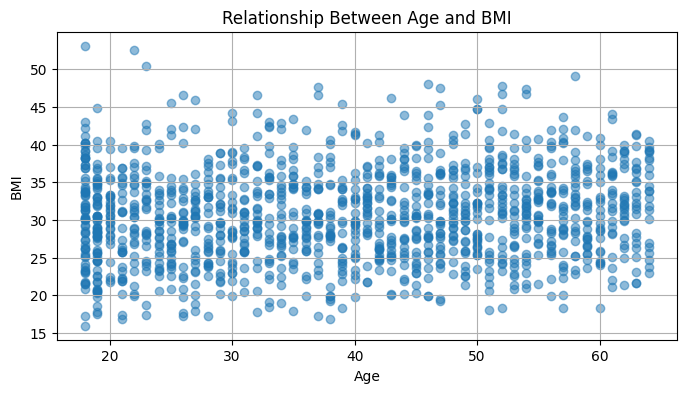

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

In [21]:
pearson_corr1 = df["age"].corr(df["bmi"], method="pearson")
spearman_corr1 = df["age"].corr(df["bmi"], method="spearman")
print(f"Pearson Correlation: {pearson_corr1:.2f}")
print(f"Spearman Correlation: {spearman_corr1:.2f}")

Pearson Correlation: 0.11
Spearman Correlation: 0.11


In [22]:
#Oops! Weak correlation!!

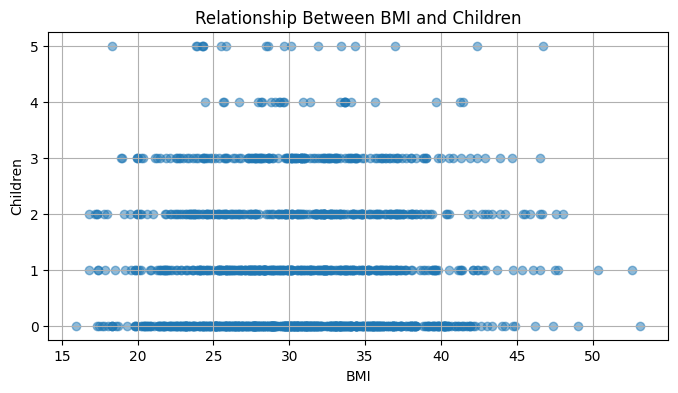

In [23]:
plt.figure(figsize=(8, 4))
plt.scatter(df["bmi"], df["children"], alpha=0.5)
plt.title("Relationship Between BMI and Children")
plt.xlabel("BMI")
plt.ylabel("Children")
plt.grid(True)
plt.show()

In [24]:
pearson_corr2 = df["children"].corr(df["bmi"], method="pearson")
spearman_corr2 = df["children"].corr(df["bmi"], method="spearman")
print(f"Pearson Correlation: {pearson_corr2:.2f}")
print(f"Spearman Correlation: {spearman_corr2:.2f}")

Pearson Correlation: 0.01
Spearman Correlation: 0.02


In [25]:
#The correlation between 'bmi' and 'children' seems to be negligible.

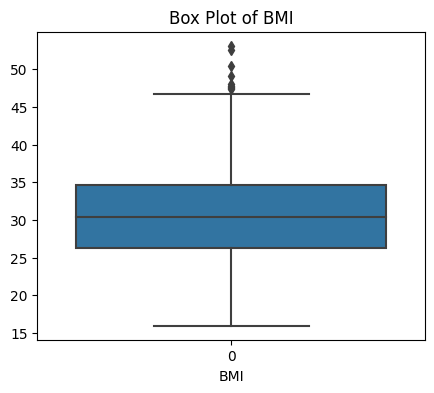

In [26]:
plt.figure(figsize=(5, 4))
sns.boxplot(df["bmi"])
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.show()

In [27]:
from scipy import stats
z_scores = stats.zscore(df["bmi"])
threshold = 3
outlier_indices = abs(z_scores) > threshold
outlier_values = df["bmi"][outlier_indices]

print("Outlier values:", outlier_values)

Outlier values: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


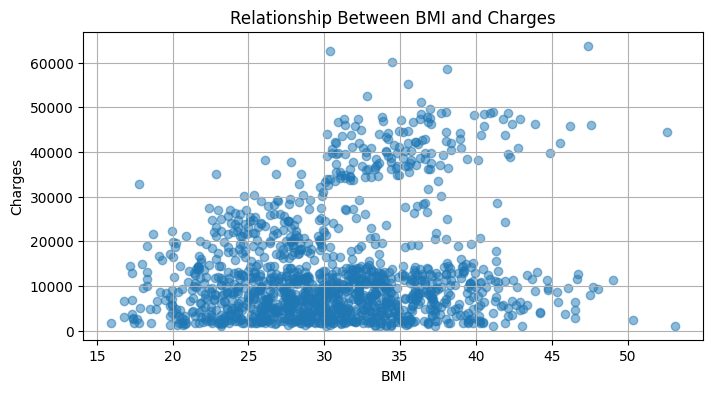

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(df["bmi"], df["charges"], alpha=0.5)
plt.title("Relationship Between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

In [29]:
pearson_corr3 = df["bmi"].corr(df["charges"], method="pearson")
spearman_corr3 = df["bmi"].corr(df["charges"], method="spearman")

print(f"Pearson Correlation: {pearson_corr3:.2f}")
print(f"Spearman Correlation: {spearman_corr3:.2f}")

Pearson Correlation: 0.20
Spearman Correlation: 0.12


In [30]:
#there is a slightly positive linear relationship between "bmi" and "charges."
#This means that as the "bmi" value increases, there is a mild tendency for "charges" to also increase, but the relationship is not very strong.

In [31]:
#There is a low-ranked positive monotonic relationship.
#This means that as "bmi" increases, there's a general trend of increasing "charges," but again, the strength of the relationship is not significant.

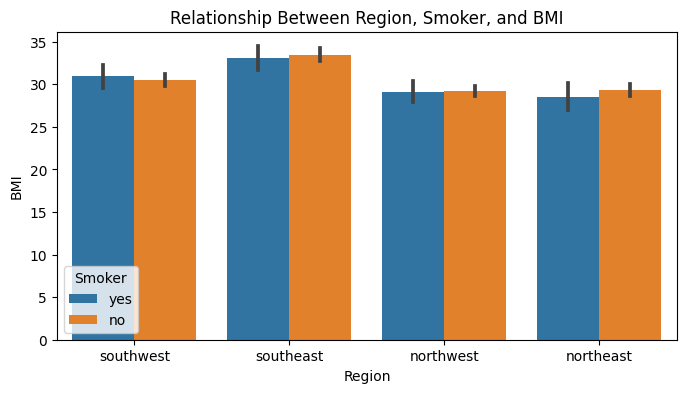

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(x="region", y="bmi", hue="smoker", data=df)
plt.title("Relationship Between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

In [35]:
df_cleaned = df[~outlier_indices] #cleaning outlier values.

In [36]:
df_encoded = pd.get_dummies(df_cleaned, columns=["region", "smoker", "sex"], prefix=["region", "smoker", "sex"])


In [37]:
df_encoded

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0,1,0


In [38]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encoded.drop("charges", axis=1))
scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.drop("charges", axis=1).columns)


In [40]:
scaled_df

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.371847,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.000000,0.554656,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.217391,0.530676,0.6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.326087,0.210059,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.304348,0.402367,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1329,0.695652,0.467456,0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1330,0.000000,0.497041,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1331,0.000000,0.650576,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1332,0.065217,0.306447,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

models = [linear_reg, decision_tree_reg, random_forest_reg]
model_names = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"]

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = (-scores)**0.5
    print(f"{name} RMSE Scores: {rmse_scores}")
    print(f"{name} Mean RMSE: {rmse_scores.mean()}\n")

Linear Regression RMSE Scores: [6084.44088532 6182.22726525 5703.22027382 6274.21477891 6096.9743586 ]
Linear Regression Mean RMSE: 6068.215512378908

Decision Tree Regression RMSE Scores: [6321.08823048 6986.09632993 6715.12046521 6210.09887732 6716.28938705]
Decision Tree Regression Mean RMSE: 6589.738657998232

Random Forest Regression RMSE Scores: [4857.79836932 5432.17466846 4299.94583064 5035.07141242 4638.41094033]
Random Forest Regression Mean RMSE: 4852.680244234614



In [42]:
#Looks like Random Forest is the best!

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_scaled, y)

print("Best Hyperparameters:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_)**0.5
print("Best RMSE:", best_rmse)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best RMSE: 4580.949186207862


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_scaled)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 12492748.371714193
Mean Absolute Error (MAE): 1906.2370950159445
R-squared (R2) Score: 0.9144628004235617


In [45]:
#MSE and MAE are low and R-squared score is 0.914! That sounds cool!